# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

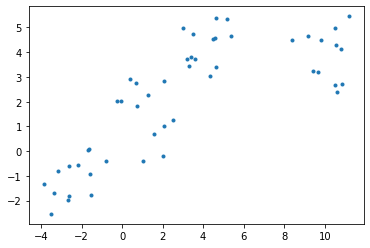

In [14]:
plt.scatter(X1[:, 0], X1[:, 1], marker='.') 

# Agglomerative Clustering

The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4
linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value will be: 'complete'
Note: It is recommended you try everything with 'average' as well

In [15]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [17]:
agglom.labels_

array([3, 0, 3, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 3, 3, 2, 1, 0, 0, 3, 0, 3,
       3, 1, 3, 3, 2, 3, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 3, 3, 0, 2, 1, 1,
       0, 0, 1, 3, 0, 2])

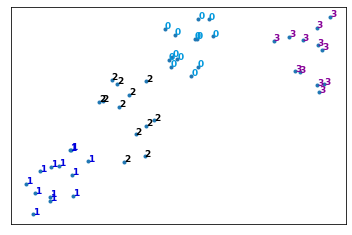

In [16]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])



plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [18]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.23902352 0.01850954 ... 0.01972183 0.55268492 0.67976894]
 [0.23902352 0.         0.22051587 ... 0.2393     0.33726048 0.4436936 ]
 [0.01850954 0.22051587 0.         ... 0.02686427 0.53537744 0.66144683]
 ...
 [0.01972183 0.2393     0.02686427 ... 0.         0.54586475 0.67702437]
 [0.55268492 0.33726048 0.53537744 ... 0.54586475 0.         0.18329197]
 [0.67976894 0.4436936  0.66144683 ... 0.67702437 0.18329197 0.        ]]


In [19]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-19-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


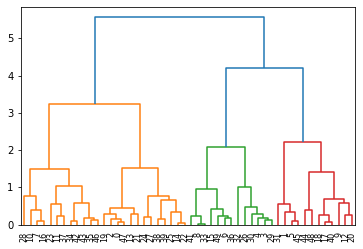

In [20]:
dendro = hierarchy.dendrogram(Z)

<ipython-input-21-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


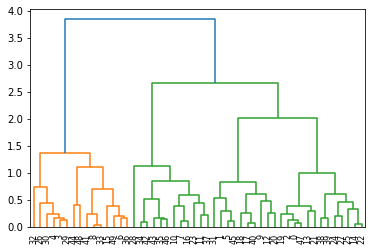

In [21]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

# Clustering on Vehicle dataset

In [34]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv')
print(data.shape)
data.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [35]:
print("Size of dataset:", data.size)

Size of dataset: 2544


In [50]:
# old_data = data
data = old_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      157 non-null    float64
 3   resale     121 non-null    float64
 4   type       157 non-null    float64
 5   price      157 non-null    float64
 6   engine_s   158 non-null    float64
 7   horsepow   158 non-null    float64
 8   wheelbas   158 non-null    float64
 9   width      158 non-null    float64
 10  length     158 non-null    float64
 11  curb_wgt   157 non-null    float64
 12  fuel_cap   158 non-null    float64
 13  mpg        156 non-null    float64
 14  lnsales    157 non-null    float64
 15  partition  159 non-null    float64
dtypes: float64(14), object(2)
memory usage: 20.0+ KB


In [51]:
print ("Shape of dataset before cleaning: ", data.size)
num_cols = data.select_dtypes(include=np.number).columns.tolist()
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')
print("Number of null values in df:\n{0}".format(data.isnull().sum()))

data = data.dropna()
data = data.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", data.size)
data.head(5)

Shape of dataset before cleaning:  2544
Number of null values in df:
manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
